In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [88]:
import sklearn

In [89]:
from sklearn.datasets import load_diabetes

In [90]:
dt = load_diabetes()

In [91]:
dt.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [92]:
x = pd.DataFrame(dt.data,columns=dt.feature_names)

In [93]:
y = dt.target

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [95]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2)

In [96]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [97]:
y_pred = model.predict(x_test)

In [98]:
from sklearn.metrics import root_mean_squared_error,r2_score

In [99]:
print(r2_score(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

0.23235011973101638
63.95923261999679


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.009\nsquared_error = 6073.714\nsamples = 353\nvalue = 153.377'),
 Text(0.25, 0.5, 'x[8] <= -0.004\nsquared_error = 3625.121\nsamples = 216\nvalue = 118.94'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 2121.133\nsamples = 133\nvalue = 95.684'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3779.826\nsamples = 83\nvalue = 156.205'),
 Text(0.75, 0.5, 'x[3] <= 0.024\nsquared_error = 5116.6\nsamples = 137\nvalue = 207.672'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 5181.671\nsamples = 72\nvalue = 176.347'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2753.71\nsamples = 65\nvalue = 242.369')]

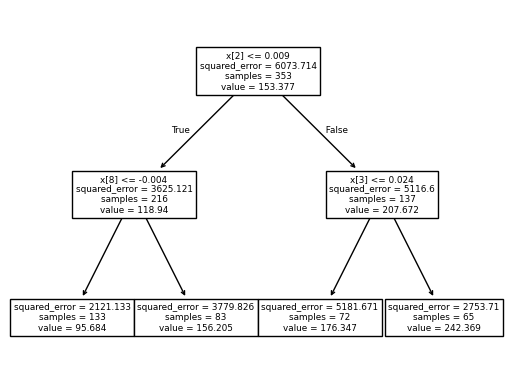

In [100]:
from sklearn import tree 
tree.plot_tree(model)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
R2 Score: 0.2579344086727967
RMSE: 62.88438216761028


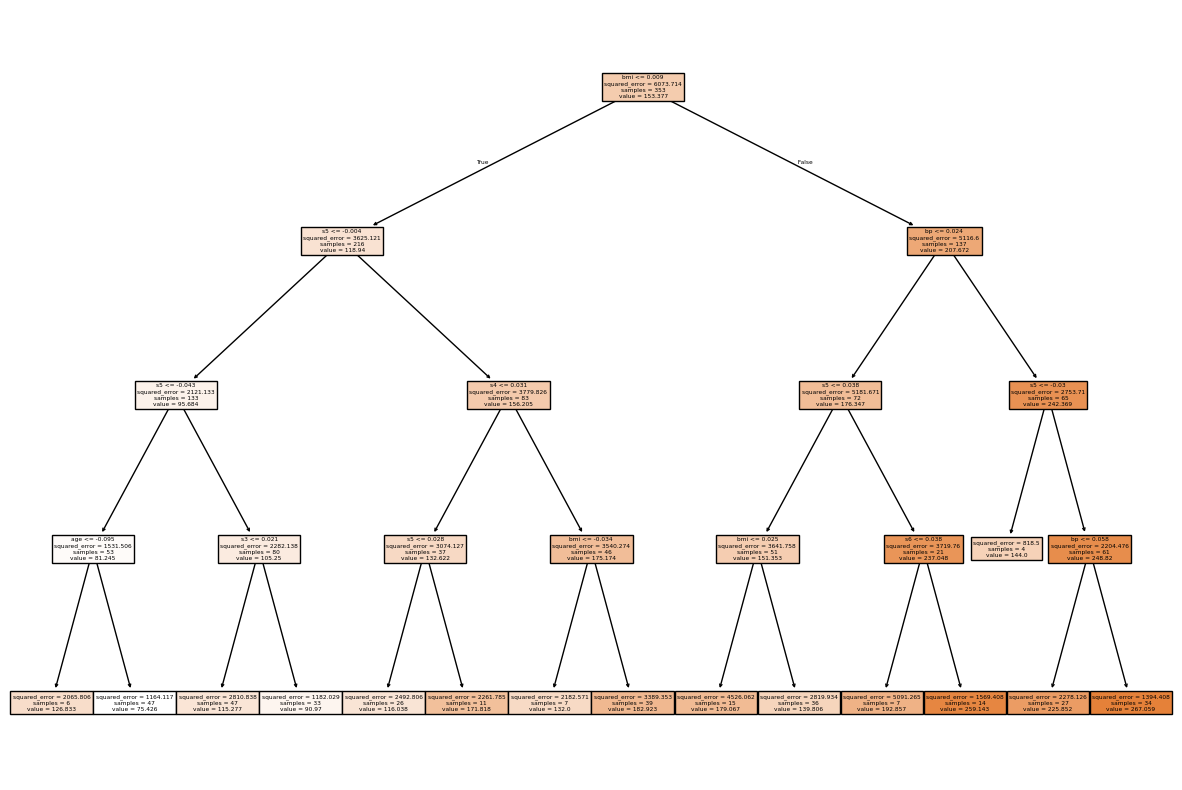

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)

# Evaluate model
print(f"Best parameters: {grid_search.best_params_}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_pred)}")

# Plot decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_model, filled=True, feature_names=dt.feature_names)
plt.show()